# Analysis:
## (For remedy )
* patients number for each remdy.
* number of patients who have adverse_reaction from each remedy
* the effectiveness for each remedy according to **hba1c_change**.
* the common adverse reactions.

## (For patients)
* peaple who suffered from adverse reactions with all information .
* femals or males who are suffered more from adverse reactions.


In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [188]:
treatments=pd.read_csv('treatments_clean.csv')
patients=pd.read_csv('patients_clean.csv')
patients.phonenumber = patients.phonenumber.astype('str')
patients.phonenumber=patients.phonenumber.str[:-2]
patients.zip_code = patients.zip_code.astype('str')
patients.zip_code=patients.zip_code.str[:-2]

# the Remedy part:


In [189]:
patients.sample(2)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,email,phonenumber
26,27,female,Ella,Lund,1207 Garfield Road,Peoria,IL,61602,United States,1933-12-19,144.8,61,27.4,EllaLund@armyspy.com,13096718852
82,84,male,Chen,Yao,2566 Ingram Street,Dayton,OH,45407,United States,1975-11-08,214.7,76,26.1,ChenYao@teleworm.us,19375231224


In [190]:
treatments.sample(2)

,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,adverse_reaction,patient_id
33,7.83,7.39,0.44,auralin,39,50,NaN,42
21,7.64,7.29,0.35,auralin,28,33,NaN,159


In [191]:
treatments.groupby('treatment')['hba1c_change'].mean()

treatment
auralin    0.387657
novodra    0.404713
Name: hba1c_change, dtype: float64

### patients numbers for each remedy.
* <p style="color:green">auralin has more patients than novodra with average one person.</p>


In [192]:
treatments.groupby('treatment')['patient_id'].count()

treatment
auralin    175
novodra    174
Name: patient_id, dtype: int64

### number of patients who have adverse_reaction from each remedy.
* <p style="color:green">novodra has more patients suffered from adverse reactions than novodra with average 11.11%.</p>


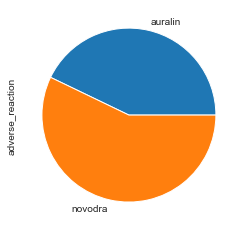

In [193]:
var=treatments.groupby('treatment')['adverse_reaction'].count()
var.plot(kind='pie')

### the effectiveness for each remedy according to hba1c_change.

In [194]:
total=treatments.hba1c_change.mean()
new=treatments.groupby('treatment')['hba1c_change'].mean()
new=pd.DataFrame(new,columns=['hba1c_change']).reset_index()
new['persentage']=(new['hba1c_change']/total)*100
new.drop('hba1c_change',axis='columns', inplace=True)
new
#treatments.groupby('treatment')['hba1c_change'].mean()

,treatment,persentage
0,auralin,97.853568
1,novodra,102.158768


* <p style="color:green"> Novodra has more effect on changing hba1c than auralin with average 2.2%.</p>


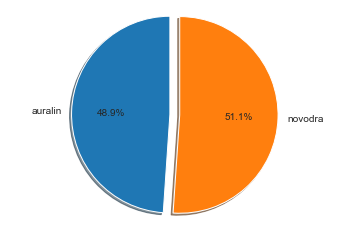

In [195]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'auralin', 'novodra'
sizes = [97.853568, 102.158768]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# the patients part:
### peaple who suffered from adverse reactions.

In [196]:
patients_have_adverse_reactions=treatments.dropna()
patients_have_adverse_reactions

,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,adverse_reaction,patient_id
11,7.95,7.60,0.35,auralin,46,57,cough,270
12,7.51,7.17,0.34,auralin,26,34,hypoglycemia,52
43,7.70,7.19,0.51,auralin,29,36,hypoglycemia,70
44,7.70,7.19,0.51,auralin,29,36,hypoglycemia,70
52,7.79,7.40,0.39,auralin,42,51,throat irritation,451
72,7.63,7.32,0.31,auralin,32,42,hypoglycemia,55
81,7.65,7.26,0.39,auralin,31,45,headache,143
85,8.34,7.90,0.44,auralin,25,31,hypoglycemia,460
90,7.64,7.23,0.41,auralin,32,41,hypoglycemia,8
124,8.35,7.97,0.38,auralin,22,30,hypoglycemia,209


* <p style="color:green">All information related to the patients who have adverse reactions. there are 35 patient.</p>
* data [dataframe]


In [197]:
data=pd.merge(patients, patients_have_adverse_reactions, on='patient_id', how='inner')
data.shape

(35, 22)

In [198]:
data.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,...,bmi,email,phonenumber,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,adverse_reaction
6,55,female,Louise,Johnson,4984 Hampton Meadows,Burlington,MA,1803,United States,1931-03-01,...,25.8,LouiseJohnson@rhyta.com,19784071874,7.63,7.32,0.31,auralin,32,42,hypoglycemia
28,403,female,Manouck,Wubbels,4789 Devils Hill Road,Utica,MS,39175,United States,1964-11-03,...,33.5,ManouckWubbels@armyspy.com,16018856550,7.66,7.40,0.26,auralin,55,62,throat irritation
32,460,female,Idalia,Moore,4380 Grim Avenue,San Diego,CA,92073,United States,1993-10-26,...,19.3,IdaliaEMoore@cuvox.de,16197106286,8.34,7.90,0.44,auralin,25,31,hypoglycemia
25,373,male,Miłosław,Wiśniewski,796 Eagle Street,Collinsville,IL,62234,United States,1979-11-13,...,22.7,MiloslawWisniewski@rhyta.com,16183463914,7.51,7.08,0.43,novodra,34,33,injection site discomfort
18,259,male,Abel,Yonatan,2621 Koontz Lane,Burbank,CA,91502,United States,1952-04-29,...,22.3,AbelYonatan@teleworm.us,18188417660,7.88,7.50,0.38,novodra,38,39,cough


### the common adverse reactions .
* <p style="color:green">Hypoglycemia the most common one.</p>


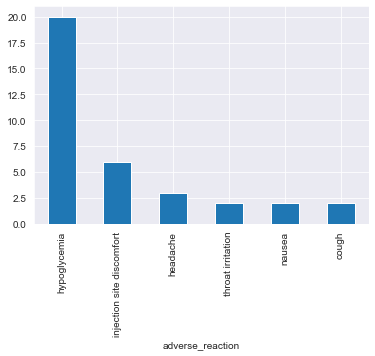

In [199]:
data.groupby('adverse_reaction')['patient_id'].count().sort_values(ascending=False).plot(kind='bar')

### plotting for which remedy has more adverse reactions on patients.
* Novodra

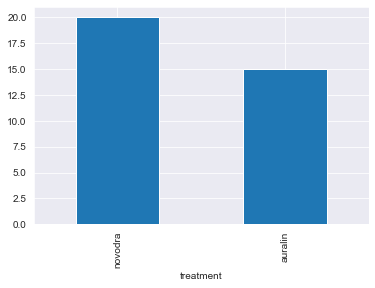

In [200]:
data.groupby('treatment')['adverse_reaction'].count().sort_values(ascending=False).plot(kind='bar')

* <p style="color:green">For each adverse reaction ,the amount of peaple who suffered from it.</p>


In [201]:
data.groupby(['treatment','adverse_reaction'])['patient_id'].count()

treatment  adverse_reaction         
auralin    cough                         1
           headache                      1
           hypoglycemia                 10
           nausea                        1
           throat irritation             2
novodra    cough                         1
           headache                      2
           hypoglycemia                 10
           injection site discomfort     6
           nausea                        1
Name: patient_id, dtype: int64

* <p style="color:green">Females or males who more suffer from adverse reactions.</p>


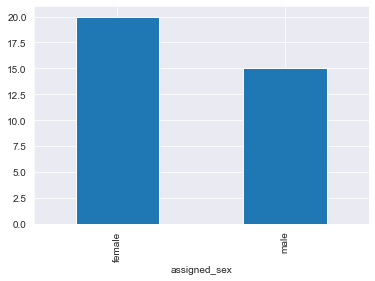

In [202]:
data.groupby('assigned_sex')['adverse_reaction'].count().plot(kind='bar')

### End Analysis